In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import statsmodels.api as sm

In [ ]:
ds = pd.read_csv('workingData\cars.csv')
ds.drop(['engine_has_gas','engine_type','feature_1','feature_2'], inplace=True, axis=1)
ds.drop(['feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], inplace=True, axis=1)
ds.drop(['has_warranty','state','is_exchangeable','location_region','number_of_photos','up_counter','feature_0'], inplace=True, axis=1)
ds.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,drivetrain,price_usd,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,2.5,universal,all,10900.00,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,3.0,universal,all,5000.00,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,2.5,suv,all,2800.00,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,3.0,sedan,all,9999.00,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,2.5,universal,all,2134.11,7


In [ ]:
ds.describe(include='all')

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,drivetrain,price_usd,duration_listed
count,38531,38531,38531,38531,38531.000000,38531.000000,38531,38521.000000,38531,38531,38531.000000,38531.000000
unique,55,1118,2,12,NaN,NaN,6,NaN,12,3,NaN,NaN
top,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,NaN,sedan,front,NaN,NaN
freq,4243,1423,25633,7705,NaN,NaN,24065,NaN,13011,27746,NaN,NaN
mean,NaN,NaN,NaN,NaN,248864.638447,2002.943734,NaN,2.055161,NaN,NaN,6639.971021,80.577249
std,NaN,NaN,NaN,NaN,136072.376530,8.065731,NaN,0.671178,NaN,NaN,6428.152018,112.826569
min,NaN,NaN,NaN,NaN,0.000000,1942.000000,NaN,0.200000,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,158000.000000,1998.000000,NaN,1.600000,NaN,NaN,2100.000000,23.000000
50%,NaN,NaN,NaN,NaN,250000.000000,2003.000000,NaN,2.000000,NaN,NaN,4800.000000,59.000000
75%,NaN,NaN,NaN,NaN,325000.000000,2009.000000,NaN,2.300000,NaN,NaN,8990.000000,91.000000


In [ ]:
ds.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_capacity      10
body_type             0
drivetrain            0
price_usd             0
duration_listed       0
dtype: int64

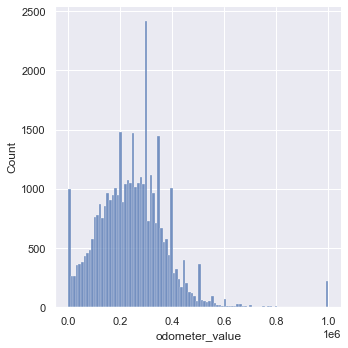

In [ ]:
sb.displot(ds['odometer_value'])

In [ ]:
q = ds['odometer_value'].quantile(0.99)
ds = ds[ds['odometer_value']<q]
q = ds['year_produced'].quantile(0.01)
ds = ds[ds['year_produced']>q]
ds = ds[ds['engine_capacity']<6.3]
q = ds['price_usd'].quantile(0.99)
ds = ds[ds['price_usd']<q]
q = ds['price_usd'].quantile(0.01)
ds =ds[ds['price_usd']>q]
q = ds['duration_listed'].quantile(0.999)
ds = ds[ds['duration_listed']<q]  #.sort_values(by='duration_listed')
q
ds = ds.reset_index(drop=True)

## Analysis

In [ ]:
ds['log_price'] = np.log(ds['price_usd'])

##  Process

In [ ]:
ds = ds[['log_price','odometer_value','year_produced','engine_capacity','engine_fuel','transmission']]

In [ ]:
ds = pd.get_dummies(ds,drop_first=True) # creating dummies for descret values

In [ ]:
from sklearn.model_selection import train_test_split
dstrain,dstest = train_test_split(ds, test_size=0.2, random_state=3)
dstrain=dstrain.reset_index(drop=True)
dstest=dstest.reset_index(drop=True)

In [ ]:
dstrain_ip = dstrain[['odometer_value', 'year_produced', 'engine_capacity',
       'engine_fuel_gas', 'engine_fuel_gasoline',
       'engine_fuel_hybrid-diesel', 'engine_fuel_hybrid-petrol',
       'transmission_mechanical']]
dstest_ip = dstest[['odometer_value', 'year_produced', 'engine_capacity',
       'engine_fuel_gas', 'engine_fuel_gasoline',
       'engine_fuel_hybrid-diesel', 'engine_fuel_hybrid-petrol',
       'transmission_mechanical']]
dstrain_target = dstrain[['log_price']]
dstest_target = dstest[['log_price']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dstrain_ip)
dstrain_ip = scaler.transform(dstrain_ip)

scaler.fit(dstest_ip)
dstest_ip = scaler.transform(dstest_ip)

In [ ]:
dstrain_ip

array([[ 0.61744603, -0.71771822, -0.98377539, ..., -0.00823862,
        -0.07969959,  0.7131805 ],
       [-1.19545218,  0.76523335, -0.98377539, ..., -0.00823862,
        -0.07969959,  0.7131805 ],
       [ 0.70360979, -0.1784631 , -0.23079506, ..., -0.00823862,
        -0.07969959,  0.7131805 ],
       ...,
       [ 1.10780097, -0.71771822,  0.22099313, ..., -0.00823862,
        -0.07969959,  0.7131805 ],
       [-0.95747768,  1.43930224, -1.13437146, ..., -0.00823862,
        -0.07969959,  0.7131805 ],
       [ 2.29767345, -0.31327688, -0.080199  , ..., -0.00823862,
        -0.07969959,  0.7131805 ]])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(dstrain_ip,dstrain_target)

LinearRegression()

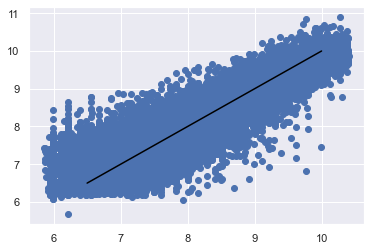

In [ ]:
y_hat = reg.predict(dstrain_ip)

plt.scatter(dstrain_target, y_hat)    #
plt.plot([6.5,10], [6.5,10], c='black')

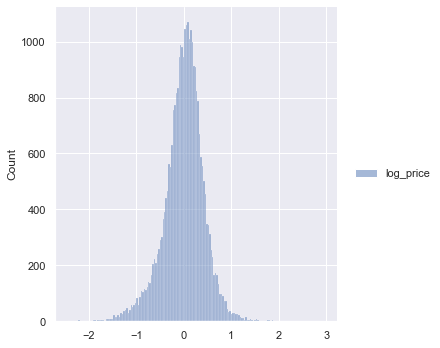

In [ ]:
sb.displot(dstrain_target-y_hat)

## Test

In [ ]:
y_hat_test = reg.predict(dstest_ip)

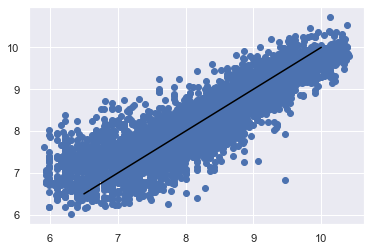

In [ ]:
plt.scatter(dstest_target, y_hat_test)
plt.plot([6.5,10], [6.5,10], c='black')

In [ ]:
Test_performance = dstest
Test_performance['Target_price'] = np.exp(Test_performance['log_price'])
Test_performance['prediction_price'] = np.exp(y_hat_test)
Test_performance['residual'] = Test_performance['Target_price'] - Test_performance['prediction_price']
Test_performance['diff_pect'] = np.absolute(Test_performance['residual']/Test_performance['Target_price']*100)

In [ ]:
#Test_performance.describe()
Test_performance.sort_values('diff_pect', ascending=True).head(30)

,log_price,odometer_value,year_produced,engine_capacity,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,transmission_mechanical,Target_price,prediction_price,residual,diff_pect
761,8.699515,240000,2002,3.0,0,0,0,0,1,6000.0,6000.168303,-0.168303,0.002805
2941,7.937375,345000,1999,2.4,0,1,0,0,1,2800.0,2800.171914,-0.171914,0.006140
1332,8.507143,295000,2005,1.6,0,0,0,0,1,4950.0,4950.344871,-0.344871,0.006967
2252,9.047821,340000,2003,3.2,0,0,0,0,0,8500.0,8499.260259,0.739741,0.008703
7081,8.874868,123000,2011,1.6,0,1,0,0,1,7150.0,7151.312018,-1.312018,0.018350
3177,9.071078,340000,2009,2.0,0,0,0,0,1,8700.0,8698.288445,1.711555,0.019673
7165,8.070906,265000,2000,2.5,0,1,0,0,1,3200.0,3201.078251,-1.078251,0.033695
2380,8.853665,211000,2007,2.0,0,0,0,0,1,7000.0,6997.482816,2.517184,0.035960
986,6.907755,236475,1993,1.3,0,1,0,0,1,1000.0,999.587115,0.412885,0.041289
4668,7.090077,325000,1994,1.5,0,1,0,0,1,1200.0,1200.579544,-0.579544,0.048295


In [ ]:
Test_performance.describe()

,log_price,odometer_value,year_produced,engine_capacity,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,transmission_mechanical,Target_price,prediction_price,residual,diff_pect
count,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.0,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000
mean,8.380036,244842.312025,2003.305239,2.055383,0.034202,0.616721,0.0,0.006379,0.662052,6430.547648,6086.238042,344.309606,35.909055
std,0.949791,116380.492540,7.381281,0.664053,0.181760,0.486218,0.0,0.079618,0.473043,5504.632800,4870.804049,2512.645714,50.886849
min,5.913503,0.000000,1985.000000,0.800000,0.000000,0.000000,0.0,0.000000,0.000000,370.000000,407.336403,-20737.557195,0.002805
25%,7.718685,160000.000000,1998.000000,1.600000,0.000000,0.000000,0.0,0.000000,0.000000,2250.000000,2247.271549,-756.420406,10.940728
50%,8.496990,250000.000000,2003.000000,2.000000,0.000000,1.000000,0.0,0.000000,1.000000,4900.000000,4666.197054,120.872831,23.050322
75%,9.093807,320000.000000,2009.000000,2.300000,0.000000,1.000000,0.0,0.000000,1.000000,8900.000000,8414.899405,1231.116548,40.446650
max,10.402511,646643.000000,2019.000000,6.200000,1.000000,1.000000,0.0,1.000000,1.000000,32942.240000,45736.557195,17736.784162,766.368949


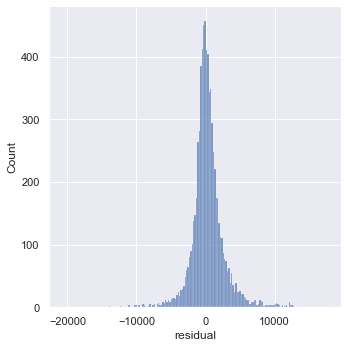

In [ ]:
sb.displot(Test_performance['residual'])